Step 1: Data Preprocessing

In [1]:
!pip install tflearn

     |████████████████████████████████| 107 kB 8.5 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=f0daa1c11ca08be73b1fbf1a6b05aca1ab4b73a33d0c9f68af75842d38f3eb3f
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [2]:
# Libraries needed for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

# Libraries needed for Tensorflow processing
import tensorflow as tf
import numpy as np
import tflearn
import random
import json

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Instructions for updating:
non-resource variables are not supported in the long term


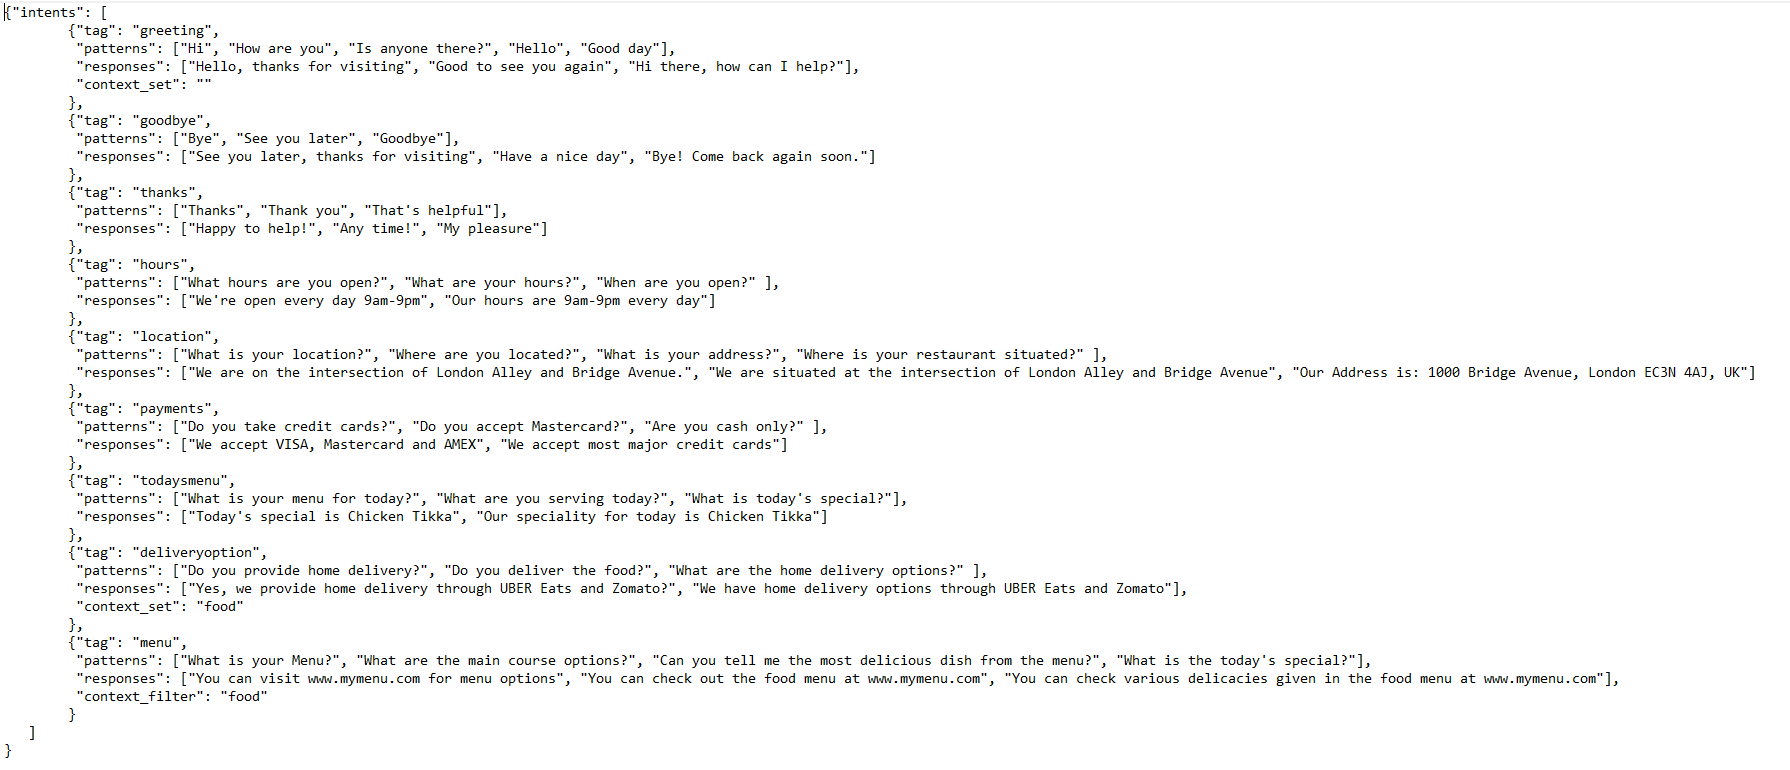

In [3]:
# import our chat-bot intents file
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [4]:
words = []
classes = []
documents = []
ignore = ['?']
# loop through each sentence in the intent's patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each and every word in the sentence
        w = nltk.word_tokenize(pattern)
        # add word to the words list
        words.extend(w)
        # add word(s) to documents
        documents.append((w, intent['tag']))
        # add tags to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [5]:
words

['Hi',
 'How',
 'are',
 'you',
 'Is',
 'anyone',
 'there',
 '?',
 'Hello',
 'Good',
 'day',
 'Bye',
 'See',
 'you',
 'later',
 'Goodbye',
 'Thanks',
 'Thank',
 'you',
 'That',
 "'s",
 'helpful',
 'What',
 'hours',
 'are',
 'you',
 'open',
 '?',
 'What',
 'are',
 'your',
 'hours',
 '?',
 'When',
 'are',
 'you',
 'open',
 '?',
 'What',
 'is',
 'your',
 'location',
 '?',
 'Where',
 'are',
 'you',
 'located',
 '?',
 'What',
 'is',
 'your',
 'address',
 '?',
 'Where',
 'is',
 'your',
 'restaurant',
 'situated',
 '?',
 'Do',
 'you',
 'take',
 'credit',
 'cards',
 '?',
 'Do',
 'you',
 'accept',
 'Mastercard',
 '?',
 'Are',
 'you',
 'cash',
 'only',
 '?',
 'What',
 'is',
 'your',
 'menu',
 'for',
 'today',
 '?',
 'What',
 'are',
 'you',
 'serving',
 'today',
 '?',
 'What',
 'is',
 'today',
 "'s",
 'special',
 '?',
 'Do',
 'you',
 'provide',
 'home',
 'delivery',
 '?',
 'Do',
 'you',
 'deliver',
 'the',
 'food',
 '?',
 'What',
 'are',
 'the',
 'home',
 'delivery',
 'options',
 '?',
 'What',
 'i

In [6]:
classes

['greeting',
 'goodbye',
 'thanks',
 'hours',
 'location',
 'payments',
 'todaysmenu',
 'deliveryoption',
 'menu']

In [7]:
documents

[(['Hi'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['What', 'hours', 'are', 'you', 'open', '?'], 'hours'),
 (['What', 'are', 'your', 'hours', '?'], 'hours'),
 (['When', 'are', 'you', 'open', '?'], 'hours'),
 (['What', 'is', 'your', 'location', '?'], 'location'),
 (['Where', 'are', 'you', 'located', '?'], 'location'),
 (['What', 'is', 'your', 'address', '?'], 'location'),
 (['Where', 'is', 'your', 'restaurant', 'situated', '?'], 'location'),
 (['Do', 'you', 'take', 'credit', 'cards', '?'], 'payments'),
 (['Do', 'you', 'accept', 'Mastercard', '?'], 'payments'),
 (['Are', 'you', 'cash', 'only', '?'], 'payments'),
 (['What', 'is', 'your', 'menu', 'for', 'today', '?'], 'todaysmenu'),
 (['What',

In [8]:
# Perform stemming and lower each word as well as remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))

# remove duplicate classes
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

31 documents
9 classes ['deliveryoption', 'goodbye', 'greeting', 'hours', 'location', 'menu', 'payments', 'thanks', 'todaysmenu']
57 unique stemmed words ["'s", 'acceiv', 'address', 'anyon', 'ar', 'bye', 'can', 'card', 'cash', 'cours', 'credit', 'day', 'del', 'delicy', 'delivery', 'dish', 'do', 'food', 'for', 'from', 'good', 'goodby', 'hello', 'help', 'hi', 'hom', 'hour', 'how', 'is', 'lat', 'loc', 'main', 'mastercard', 'me', 'menu', 'most', 'on', 'op', 'opt', 'provid', 'resta', 'see', 'serv', 'situ', 'spec', 'tak', 'tel', 'thank', 'that', 'the', 'ther', 'today', 'what', 'when', 'wher', 'yo', 'you']


In [9]:
training = []
output = []
output_empty = [0] * len(classes)

In [10]:
# create training set, bag of words for each sentence
for doc in documents:
    # initialize bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stemming each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    print(pattern_words)
    # create bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is '1' for current tag and '0' for rest of other tags
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    print(output_row)
    print(bag)

    training.append([bag, output_row])

# shuffling features and turning it into np.array
random.shuffle(training)
training = np.array(training)
print(training)
# creating training lists
train_x = list(training[:,0])
train_y = list(training[:,1])

['hi']
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['how', 'ar', 'you']
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
['is', 'anyon', 'ther', '?']
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
['hello']
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['good', 'day']
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [11]:
print(train_x)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
print(train_y)

[[0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]]


Model_Training

In [14]:
# resetting underlying graph data
tf.compat.v1.reset_default_graph()

# Building neural network
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 10)
net = tflearn.fully_connected(net, 10)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)

# Defining model and setting up tensorboard
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

# Start training
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
model.save('model.tflearn')

Training Step: 3999  | total loss: 1.13264 | time: 0.013s
| Adam | epoch: 1000 | loss: 1.13264 - acc: 0.8573 -- iter: 24/31
Training Step: 4000  | total loss: 1.04966 | time: 0.018s
| Adam | epoch: 1000 | loss: 1.04966 - acc: 0.8716 -- iter: 31/31
--
INFO:tensorflow:/content/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [15]:
import pickle
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Inference

In [16]:
# restoring all the data structures
data = pickle.load( open( "training_data", "rb" ) )

In [19]:
# restoring all the data structures
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

In [18]:
# load the saved model
model.load('./model.tflearn')

INFO:tensorflow:Restoring parameters from /content/model.tflearn


In [20]:
#Pre-requisite components
def clean_up_sentence(sentence):
    # tokenizing the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stemming each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# returning bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenizing the pattern
    sentence_words = clean_up_sentence(sentence)
    # generating bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [23]:
ERROR_THRESHOLD = 0.30
def classify(sentence):
    # generate probabilities from the model
    results = model.predict([bow(sentence, words)])[0]
    print(results)
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    print(results)
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [25]:
classify('What is menu for today?')

[3.2465574e-03 1.3857209e-05 2.0086465e-03 8.4891845e-04 1.1811511e-01
 8.1423447e-02 4.9491009e-05 7.2784023e-06 7.9428673e-01]
[[8, 0.7942867]]


[('todaysmenu', 0.7942867)]

In [26]:
response('What is menu for today?')

[3.2465574e-03 1.3857209e-05 2.0086465e-03 8.4891845e-04 1.1811511e-01
 8.1423447e-02 4.9491009e-05 7.2784023e-06 7.9428673e-01]
[[8, 0.7942867]]
Today's special is Chicken Tikka
